# The Mortality Notebook

Name:  Leah Nicholson <br/>
Date: 04/13/2025<br/>

Description:  <br/>
The mortality_data dataframe consists of - <br/>
Year - the year of recording data<br/>
AgeGroup - the age group (range) of children<br/>
DeathRate - the given deathrate per year<br/>
MeanCentered - the mean (centered) value<br/>

The mortality_wide displays AgeGroup as columns. <br/>

In [2]:
import pandas as pd

## Get the long and wide DataFrames

1-4. Retrieving the data from the pkl file:

In [5]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [6]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


## Work With the long DataFrame

5. Display the first five rows of the DataFrame:

In [9]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


6. Change the name of the "Deathrate" column for clarity:

In [11]:
mortality_data.columns = mortality_data.columns.str.replace('DeathRate', 'Deaths/100k')
mortality_data.head()

,Year,AgeGroup,Deaths/100k,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


7. Access and display first five rows of Year and MeanCentered:

In [13]:
mortality_data[['Year', 'MeanCentered']].head()

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


8. Access and display the last six ROWS of data from 1915 to 1920 - use query:

In [15]:
mortality_data.query('Year >= 1915 and Year <= 1920').tail(6)

,Year,AgeGroup,Deaths/100k,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


9. Access and display the Year and Deaths/100k COLUMNS for the age group 01-04 Years:

In [17]:
mortality_data.query('AgeGroup == "01-04 Years"')[['Year', 'Deaths/100k']].head()

,Year,Deaths/100k
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5


10. Sort the DataFrame by the Dealths/100k column in descending sequence, and display.
Then, modify it to display the first and last three rows of the results.

In [19]:
# mortality_data.sort_values('Deaths/100k', ascending = False)

with pd.option_context(
    'display.max_rows', 6, 
    'display.max_columns', None):
    display(mortality_data.sort_values('Deaths/100k', ascending = False))

,Year,AgeGroup,Deaths/100k,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


11. Calculate the median of ALL the values in the Deaths/100k column:

In [21]:
mortality_data['Deaths/100k'].median()

89.5

12. Group the data by year
    Calculate the sum of the Deaths/100k column

In [23]:
mortality_data.groupby('Year')[['Deaths/100k']].sum()

,Deaths/100k
Year,
1900,3233.0
1901,2850.6
1902,2733.0
1903,2659.1
1904,2793.1
...,...
2014,95.0
2015,99.5
2016,103.3


## Work with the wide DataFrame

13. Display the first five ROWS of the dataframe

In [26]:
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


14. Display index info for the DataFrame:

In [28]:
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

15. Use the describe() method to display stat info for the numeric columns in the DataFrame
    Start by coding this statement without the T property
    Then, add T property to see how display changes

In [30]:
# mortality_wide.describe()

mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
01-04 Years,119.0,383.226050,500.454211,24.0,50.65,109.1,577.30,1983.8
05-09 Years,119.0,117.326050,127.474958,11.4,24.00,48.4,198.90,466.1
10-14 Years,119.0,93.769748,88.404363,13.9,27.20,44.6,158.90,375.1
15-19 Years,119.0,177.374790,138.362290,44.8,85.45,106.9,283.65,777.4


16. Access and display just the Year, and the 01-04 Years columns

In [32]:
mortality_wide[['Year', '01-04 Years']]

,Year,01-04 Years
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


17. Access and display just the ROWS for the years from 1915 - 1920:

In [34]:
mortality_wide.query('Year >= 1915 and Year <= 1920').head(6)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,924.2,260.6,196.7,330.9
16,1916,1111.5,282.4,205.1,355.8
17,1917,1066.0,290.7,218.9,380.3
18,1918,1573.5,447.9,375.1,777.4
19,1919,928.0,300.0,236.4,438.5
20,1920,987.2,295.2,229.9,402.9


18. Combine steps 16 and 17 into a single cell
    That accesses and displays the Year
    And 01-04 Years columns
    For the years 1915 through 1920:

In [36]:
mortality_wide.query('Year >= 1915 and Year <= 1920')[['Year', '01-04 Years']].head(6)

,Year,01-04 Years
15,1915,924.2
16,1916,1111.5
17,1917,1066.0
18,1918,1573.5
19,1919,928.0
20,1920,987.2


19. Aggregate the data for all numeric columns in each year
    display the mean, median, sum for those columns

In [38]:
mortality_data.groupby('Year')[["Deaths/100k", "MeanCentered"]].agg(['mean', 'median', 'sum'])

Deaths/100k                 MeanCentered                        
            mean  median     sum         mean     median          sum
Year                                                                 
1900     808.250  475.45  3233.0    615.32584  282.52584  2461.303361
1901     712.650  441.00  2850.6    519.72584  248.07584  2078.903361
1902     683.250  412.40  2733.0    490.32584  219.47584  1961.303361
1903     664.775  424.40  2659.1    471.85084  231.47584  1887.403361
1904     698.275  448.20  2793.1    505.35084  255.27584  2021.403361
...          ...     ...     ...          ...        ...          ...
2014      23.750   19.00    95.0   -169.17416 -173.92416  -676.696639
2015      24.875   19.75    99.5   -168.04916 -173.17416  -672.196639
2016      25.825   19.95   103.3   -167.09916 -172.97416  -668.396639
2017      25.725   19.90   102.9   -167.19916 -173.02416  -668.796639
2018      24.900   19.45    99.6   -168.02416 -173.47416  -672.096639

[119 rows x 6 columns]

20. Add a new column to the DataFrame named TotalDeaths
    The value of this column should be the sum of the values in each of the year range columns
    Display the DataFrame with the new column

In [40]:
mortality_wide['TotalDeaths'] = \
    mortality_wide['01-04 Years'] + \
    mortality_wide['05-09 Years'] + \
    mortality_wide['10-14 Years'] + \
    mortality_wide['15-19 Years']
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,1983.8,466.1,298.3,484.8,3233.0
1,1901,1695.0,427.6,273.6,454.4,2850.6
2,1902,1655.7,403.3,252.5,421.5,2733.0
3,1903,1542.1,414.7,268.2,434.1,2659.1
4,1904,1591.5,425.0,305.2,471.4,2793.1
...,...,...,...,...,...,...
114,2014,24.0,11.5,14.0,45.5,95.0
115,2015,24.9,11.7,14.6,48.3,99.5
116,2016,25.3,12.2,14.6,51.2,103.3
117,2017,24.3,11.6,15.5,51.5,102.9


21. Create a line plot that shows the total death rates by year:

<Axes: xlabel='Year'>

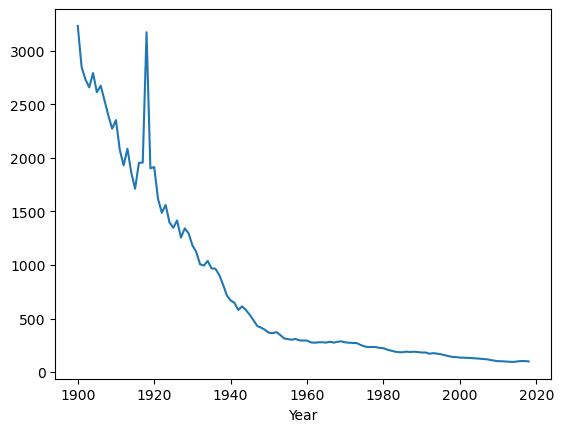

In [42]:
mortality_wide.groupby('Year').TotalDeaths.sum().plot()